# Kaggle: Customer Segmentation Analysis

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r"C:\Users\Atrey\Downloads\Mall_Customers.csv")
data = pd.DataFrame(data)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.Age.unique()
#First look: age ranges between 3 to 70 years old

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [7]:
data.isna().sum()
#no null values, complete data entry

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Gender and Salary Study

In [9]:
#Create table for Gender and salaries study
dataGender = pd.DataFrame()
dataGender['Gender'] = data['Gender']
dataGender['Gender'] = dataGender['Gender']
dataGender['Age'] = data['Age']
dataGender['Annual Income'] = data['Annual Income (k$)']
dataGender['Spend Score'] = data['Spending Score (1-100)']

print(dataGender.info())
dataGender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         200 non-null    object
 1   Age            200 non-null    int64 
 2   Annual Income  200 non-null    int64 
 3   Spend Score    200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


,Gender,Age,Annual Income,Spend Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [27]:
def findGenderMale(data):
    for i in range(len(data)):
        if data == 'Male':
            return 1
        else: 
            return 0
def findGenderFemale(data):
    for i in range(len(data)):
        if data == 'Female':
            return 1
        else: 
            return 0

In [12]:
#Find specific counts of male and females in the data
countsMale = dataGender['Gender'].apply(findGenderMale)

countsMale.sum()


88

In [13]:
countsFemale = dataGender['Gender'].apply(findGenderFemale)

countsFemale.sum()

112

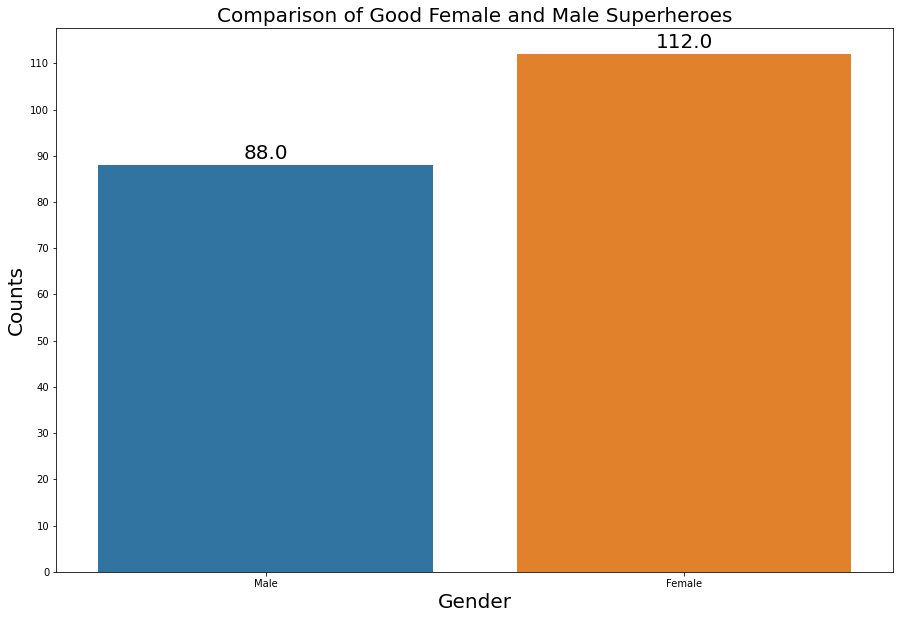

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
series = [88, 112]
plt = sns.barplot(x = ['Male', 'Female'], y = series)
for p in plt.patches:
    plt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=20,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
plt.set_yticks(np.arange(0, 120, 10))
plt.set_title("Comparison of Good Female and Male Superheroes", fontsize = 20)
plt.set_xlabel("Gender", fontsize = 20)
plt.set_ylabel("Counts", fontsize = 20)
fig.set_size_inches(15,10)

In [15]:
dataGender.loc[dataGender['Gender'] == 'Male'].describe()

,Age,Annual Income,Spend Score
count,88.000000,88.000000,88.000000
mean,39.806818,62.227273,48.511364
std,15.514812,26.638373,27.896770
min,18.000000,15.000000,1.000000
25%,27.750000,45.500000,24.500000
50%,37.000000,62.500000,50.000000
75%,50.500000,78.000000,70.000000
max,70.000000,137.000000,97.000000


In [16]:
dataGender.loc[dataGender['Gender'] == 'Female'].describe()

,Age,Annual Income,Spend Score
count,112.000000,112.000000,112.000000
mean,38.098214,59.250000,51.526786
std,12.644095,26.011952,24.114950
min,18.000000,16.000000,5.000000
25%,29.000000,39.750000,35.000000
50%,35.000000,60.000000,50.000000
75%,47.500000,77.250000,73.000000
max,68.000000,126.000000,99.000000


C:\Users\Atrey\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


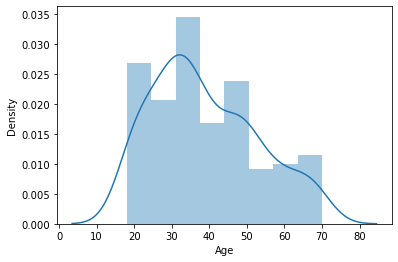

In [17]:
a = sns.distplot(dataGender['Age'])
print(a)

In [18]:
dataGender.loc[dataGender['Gender'] == 'Male']
dataAgeMale = pd.DataFrame()
dataAgeMale = dataGender.loc[dataGender['Gender'] == 'Male']
dataAgeMale.reset_index(drop = True)
dataAgeMale.to_csv('dataAge.csv')

In [19]:
dataAgeMale.to_excel('dataAge.xlsx')

C:\Users\Atrey\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


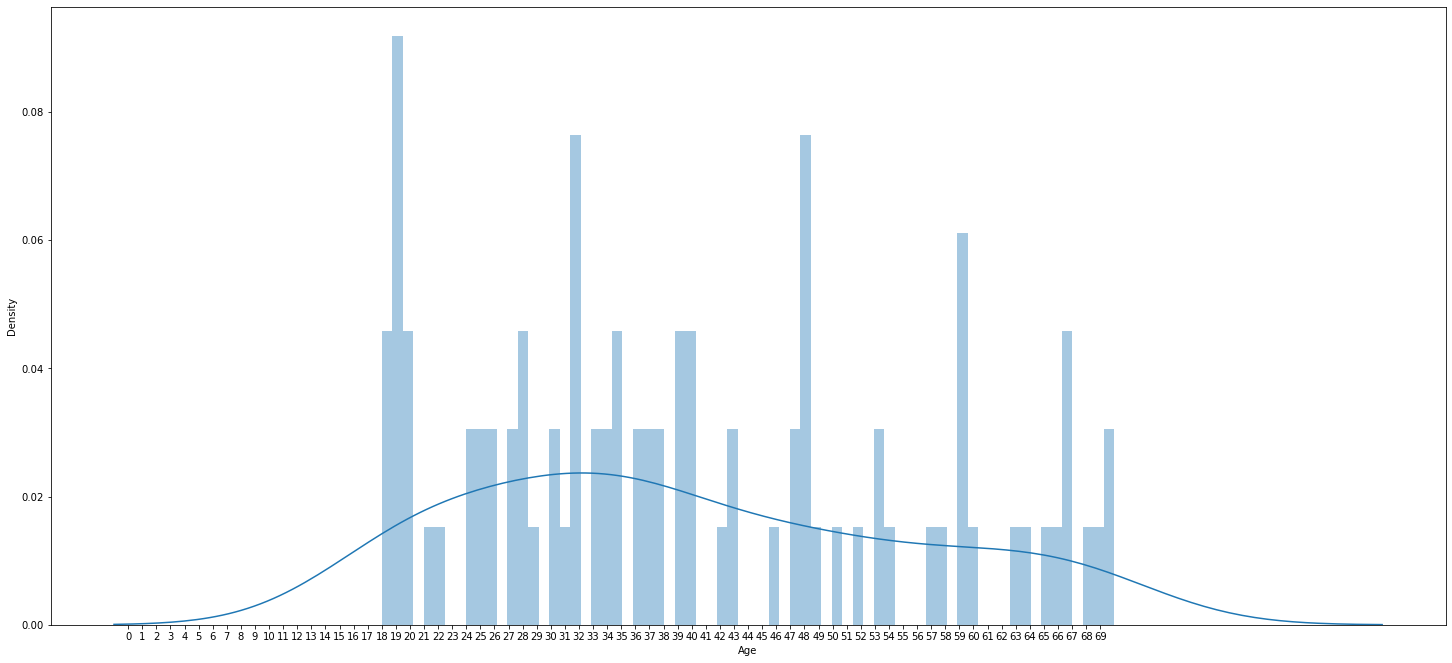

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(211)
plotMaleAge = sns.distplot(dataAgeMale['Age'], bins = 70, ax = ax1)
plotMaleAge.set_xticks(np.arange(0, 70, step=1))
fig.set_size_inches(25,25)

In [29]:
dataGender.loc[dataGender['Gender'] == 'Female']
dataAgeFemale = pd.DataFrame()
dataAgeFemale = dataGender.loc[dataGender['Gender'] == 'Female']
dataAgeFemale.reset_index(drop = True)

,Gender,Age,Annual Income,Spend Score
0,Female,20,16,6
1,Female,23,16,77
2,Female,31,17,40
3,Female,22,17,76
4,Female,35,18,6
...,...,...,...,...
107,Female,32,103,69
108,Female,38,113,91
109,Female,47,120,16
110,Female,35,120,79


C:\Users\Atrey\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


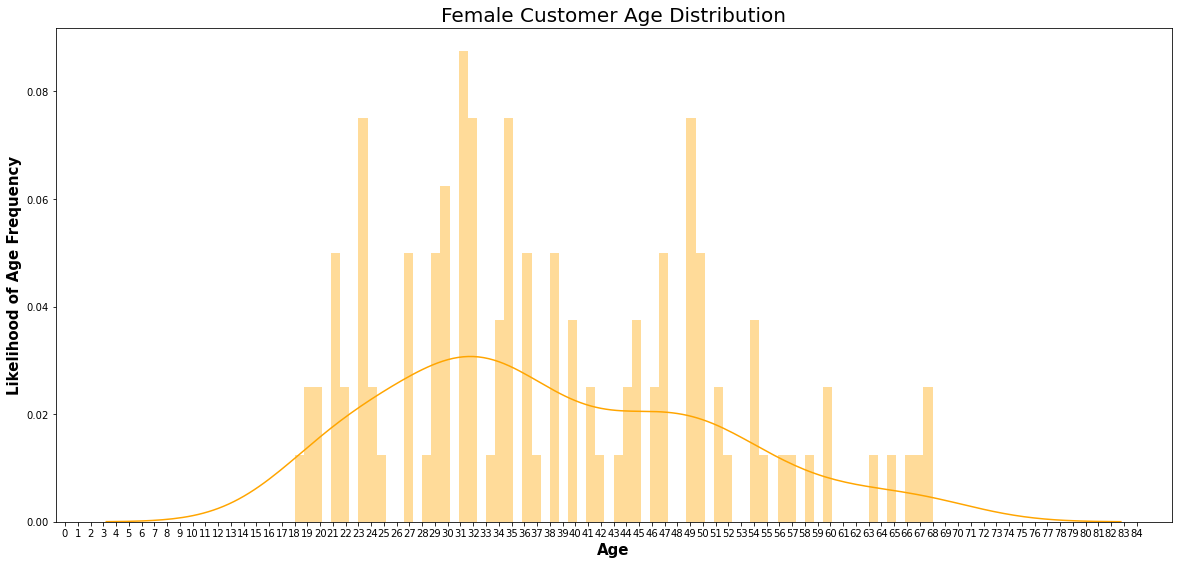

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

a = sns.distplot(x = dataAgeFemale['Age'], ax = ax1, color = 'orange', bins = 70, kde = True)
a
a.set_title('Female Customer Age Distribution', fontsize = 20)
a.set_ylabel('Likelihood of Age Frequency', fontweight = 'bold', fontsize = 15)
a.set_xlabel('Age', fontweight = 'bold', fontsize = 15)
a.set_xticks(np.arange(0,85, step = 1))
fig.set_size_inches(20,20)

In [31]:
def labelScores(data):
    for i in range(data):
        if data <= 35:
            return 'Low Score'
        elif data > 35 and data <= 65:
            return 'Mid Score'
        else: 
            return 'High Score'

In [32]:
dataLabelledScores = dataAgeFemale['Spend Score'].apply(labelScores)
dataLabelledScores = pd.DataFrame(dataLabelledScores)
dataAgeFemale['Score Label'] = dataLabelledScores
dataAgeFemale.reset_index(drop = True)

<ipython-input-32-0d043ebb87e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAgeFemale['Score Label'] = dataLabelledScores


,Gender,Age,Annual Income,Spend Score,Score Label
0,Female,20,16,6,Low Score
1,Female,23,16,77,High Score
2,Female,31,17,40,Mid Score
3,Female,22,17,76,High Score
4,Female,35,18,6,Low Score
...,...,...,...,...,...
107,Female,32,103,69,High Score
108,Female,38,113,91,High Score
109,Female,47,120,16,Low Score
110,Female,35,120,79,High Score


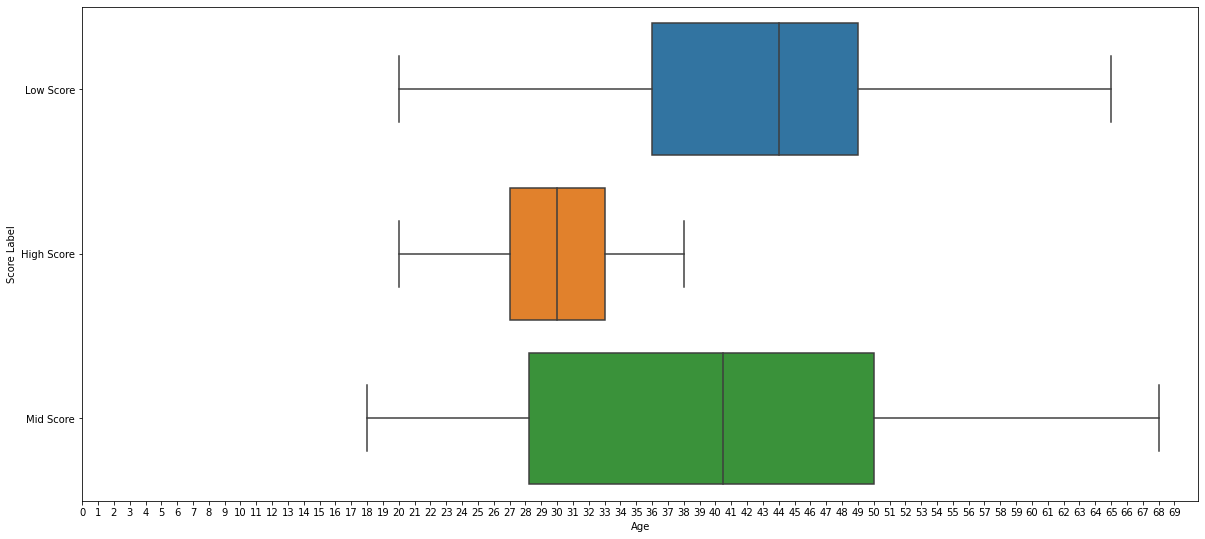

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
b = sns.boxplot(x = dataAgeFemale['Age'], y = dataAgeFemale['Score Label'], ax = ax1)
b.set_xticks(np.arange(0, 70, step=1))  # Set label locations.
fig.set_size_inches(20,20)


In [34]:
dataAgeFemale.corr()

,Age,Annual Income,Spend Score
Age,1.000000,0.059912,-0.375439
Annual Income,0.059912,1.000000,0.047542
Spend Score,-0.375439,0.047542,1.000000


In [35]:
dataAgeMale.corr()

,Age,Annual Income,Spend Score
Age,1.000000,-0.092978,-0.279628
Annual Income,-0.092978,1.000000,-0.023684
Spend Score,-0.279628,-0.023684,1.000000


## Analyse Income Streams

In [36]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Score']

In [37]:
data

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
data.Income.unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [39]:
def labelIncome(data):
    for i in range(data):
        if data <= 54:
            return 'Low Income'
        elif data > 54 and data <= 79:
            return 'Average Income'
        else:
            return 'High Income'
        

In [40]:
dataIncomeLabel = data['Income'].apply(labelIncome)
data['IncomeStream'] = dataIncomeLabel
data

,CustomerID,Gender,Age,Income,Score,IncomeStream
0,1,Male,19,15,39,Low Income
1,2,Male,21,15,81,Low Income
2,3,Female,20,16,6,Low Income
3,4,Female,23,16,77,Low Income
4,5,Female,31,17,40,Low Income
...,...,...,...,...,...,...
195,196,Female,35,120,79,High Income
196,197,Female,45,126,28,High Income
197,198,Male,32,126,74,High Income
198,199,Male,32,137,18,High Income


Text(0.5, 1.0, 'Salary Brackets per Age group')

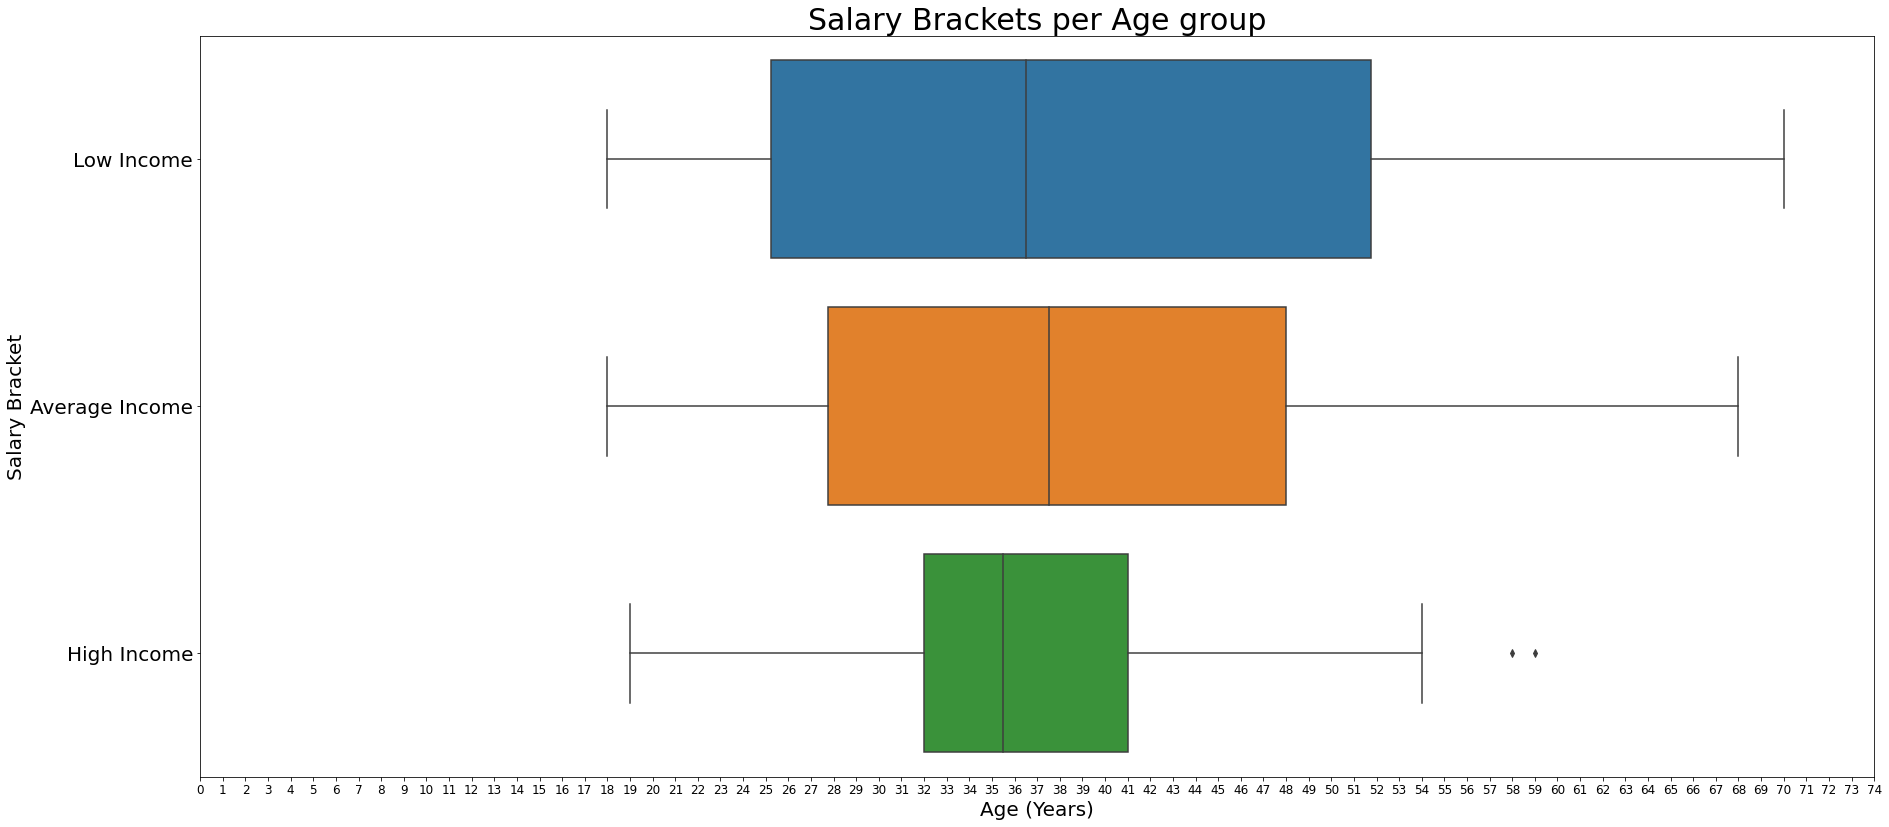

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
a = sns.boxplot(x = data['Age'], y = data['IncomeStream'], ax = ax1)
a.set_xticks(np.arange(0,75, step = 1))
fig.set_size_inches(30,30)
a.tick_params(axis = 'x', labelsize = 12)
a.tick_params(axis = 'y', labelsize = 20)
a.set_xlabel('Age (Years)', fontsize = 20)
a.set_ylabel('Salary Bracket', fontsize = 20)
a.set_title('Salary Brackets per Age group', fontsize = 30)


<AxesSubplot:xlabel='Score', ylabel='Income'>

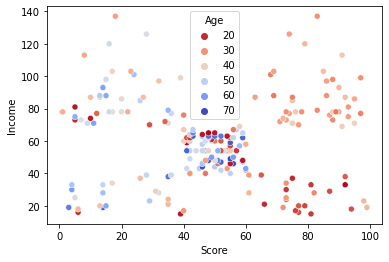

In [42]:
sns.scatterplot(data = data, x = data['Score'], y = data['Income'], hue = data.Age, palette = 'coolwarm_r')

<AxesSubplot:xlabel='Score', ylabel='Income'>

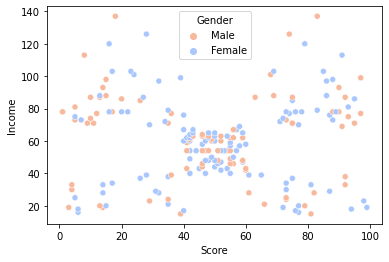

In [43]:
sns.scatterplot(data = data, x = data['Score'], y = data['Income'], hue = data.Gender, palette = 'coolwarm_r')

In [44]:
from sklearn.cluster import KMeans
X = data[['Income', 'Score']]
km = KMeans(n_clusters = 5, n_init = 5, init = 'random', random_state = 42)
km.fit(X)
y_kmeans = km.predict(X)
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

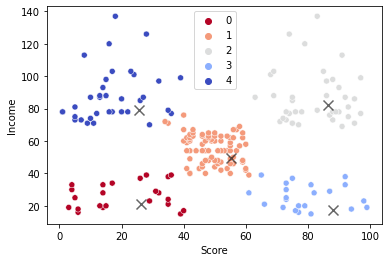

In [45]:
sns.scatterplot(data = data, x = data['Score'], y = data['Income'], hue = y_kmeans, palette = 'coolwarm_r')
centers = km.cluster_centers_

plt.scatter(centers[:,0], centers[:, 1], c = 'black', s = 100, alpha = 0.6, marker = 'x')

In [46]:
from sklearn.metrics import accuracy_score
km.inertia_

44448.45544793369

In [47]:
newdata = [[120, 100]]
y_pred = km.predict(newdata)
y_pred


array([2])

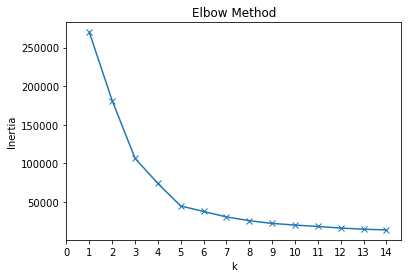

In [48]:
inertia = []
K = range(1,15)
for i in K:
    km = KMeans(n_clusters = i)
    km = km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker = 'x')
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()

As seen above, the elbow method can be used to derive the optimal number of clusters in this problem space